<a href="https://colab.research.google.com/github/Jyothisham/Fish-species-classification-using-MobileNetV2/blob/main/Fish_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset # Download the dataset
!unzip a-large-scale-fish-dataset.zip -d fish_dataset # Extract the zip file to a 'fish_dataset' directory

fish_dir = 'fish_dataset/Fish_Dataset' # Update the path to the extracted dataset
classes = [i for i in os.listdir(fish_dir) if '.' not in i]
classes

Streaming output truncated to the last 5000 lines.
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: 

['Fish_Dataset']

In [ ]:
label = []
path = []

for dir_name, _,filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dir_name.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dir_name)[-1])         # Append the directory name to label
                path.append(os.path.join(dir_name,filename))     # Append all the png files to path of that directory

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label


In [ ]:
data.tail()

path            label
8995  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...  Hourse Mackerel
8996  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...  Hourse Mackerel
8997  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...  Hourse Mackerel
8998  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...  Hourse Mackerel
8999  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...  Hourse Mackerel

In [ ]:
data.head()

path   label
0  fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/...  Shrimp
1  fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/...  Shrimp
2  fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/...  Shrimp
3  fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/...  Shrimp
4  fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/...  Shrimp

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
data['label'].value_counts()

label
Shrimp                1000
Black Sea Sprat       1000
Trout                 1000
Red Mullet            1000
Striped Red Mullet    1000
Red Sea Bream         1000
Gilt-Head Bream       1000
Sea Bass              1000
Hourse Mackerel       1000
Name: count, dtype: int64

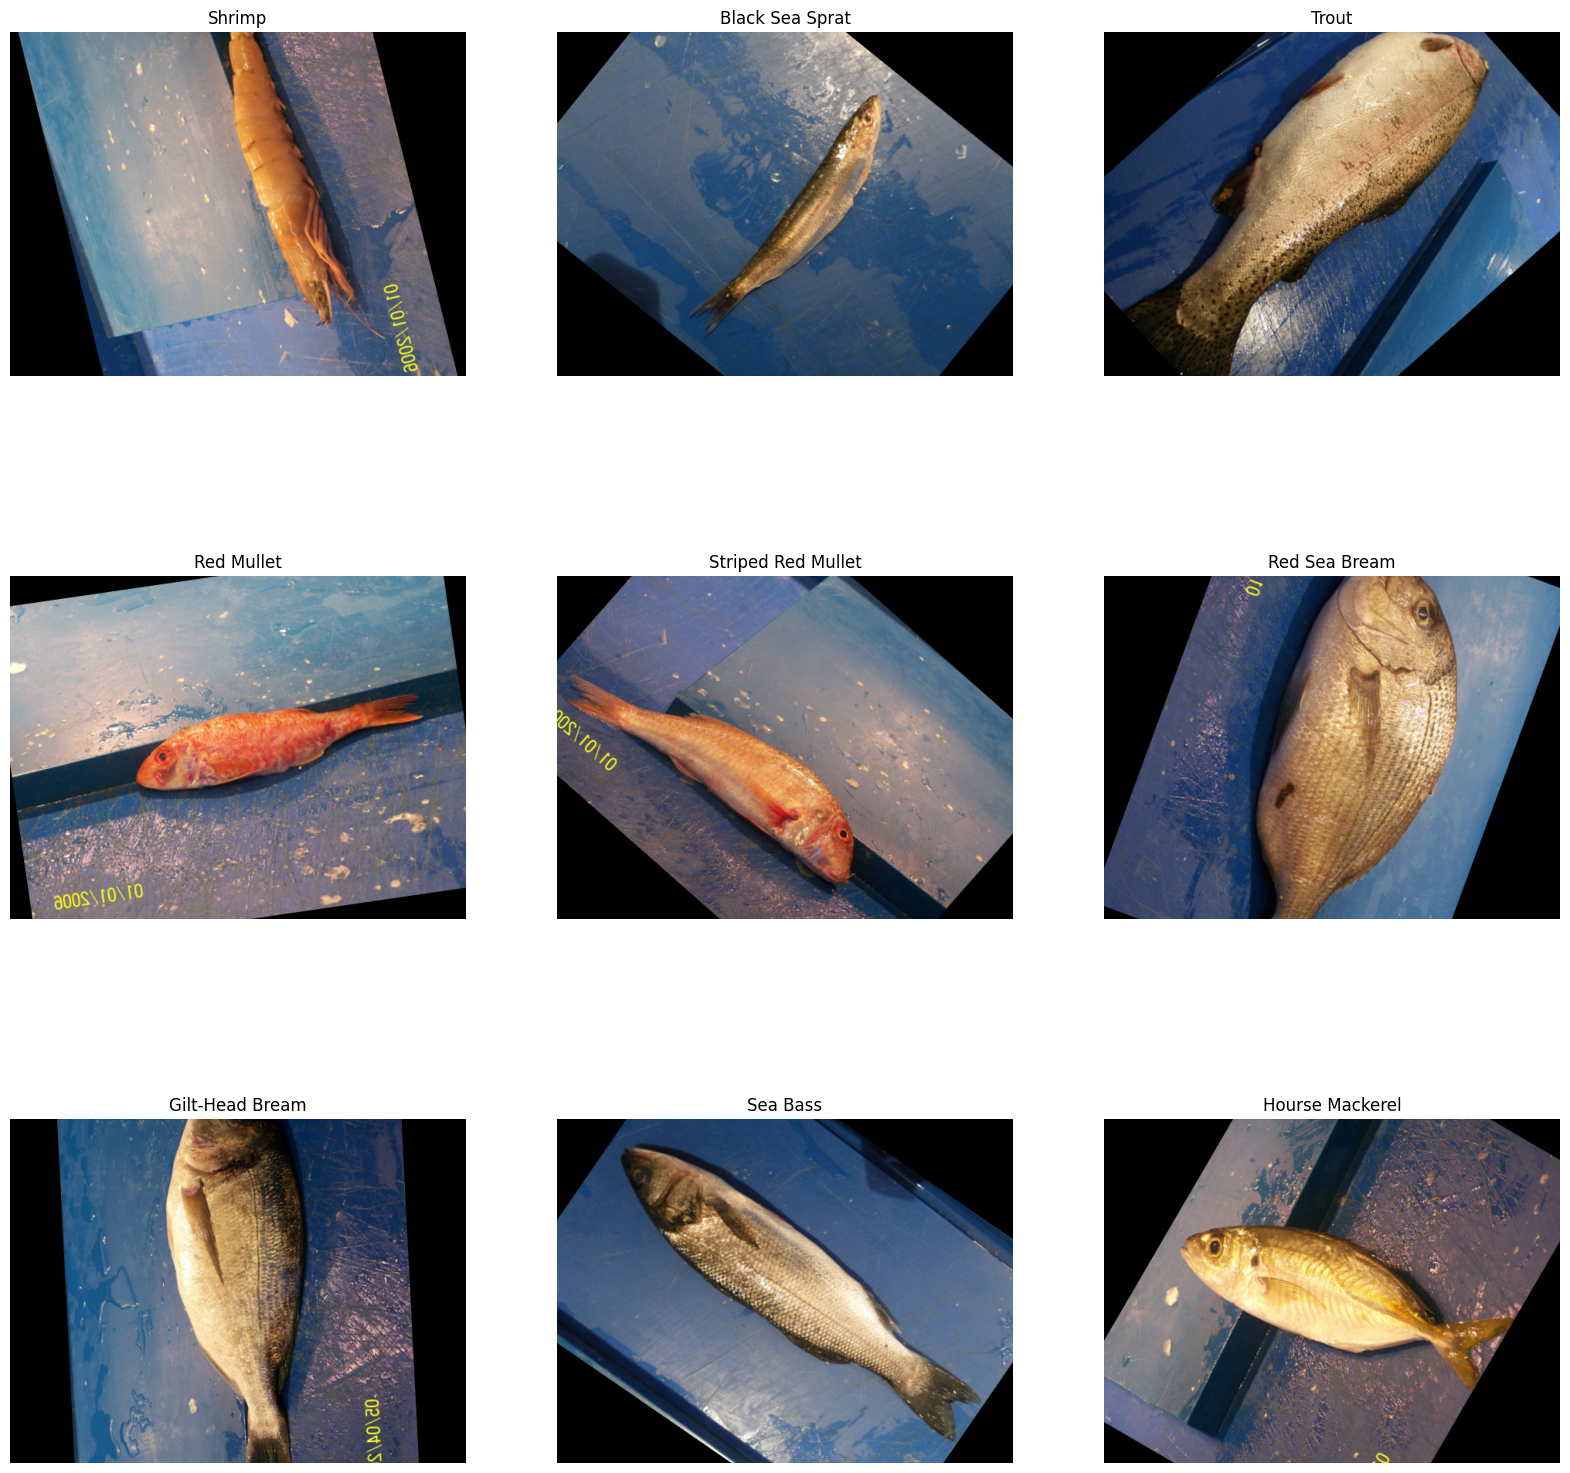

In [ ]:
cn = 0
plt.figure(figsize=(20,20))
for unique_label in data['label'].unique():
    plt.subplot(3, 3, cn+1)
    plt.imshow(plt.imread(data[data['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    cn+=1

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(7200, 2)
(1800, 2)


# Preprocessing and generation

In [ ]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_images = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_data, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [ ]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

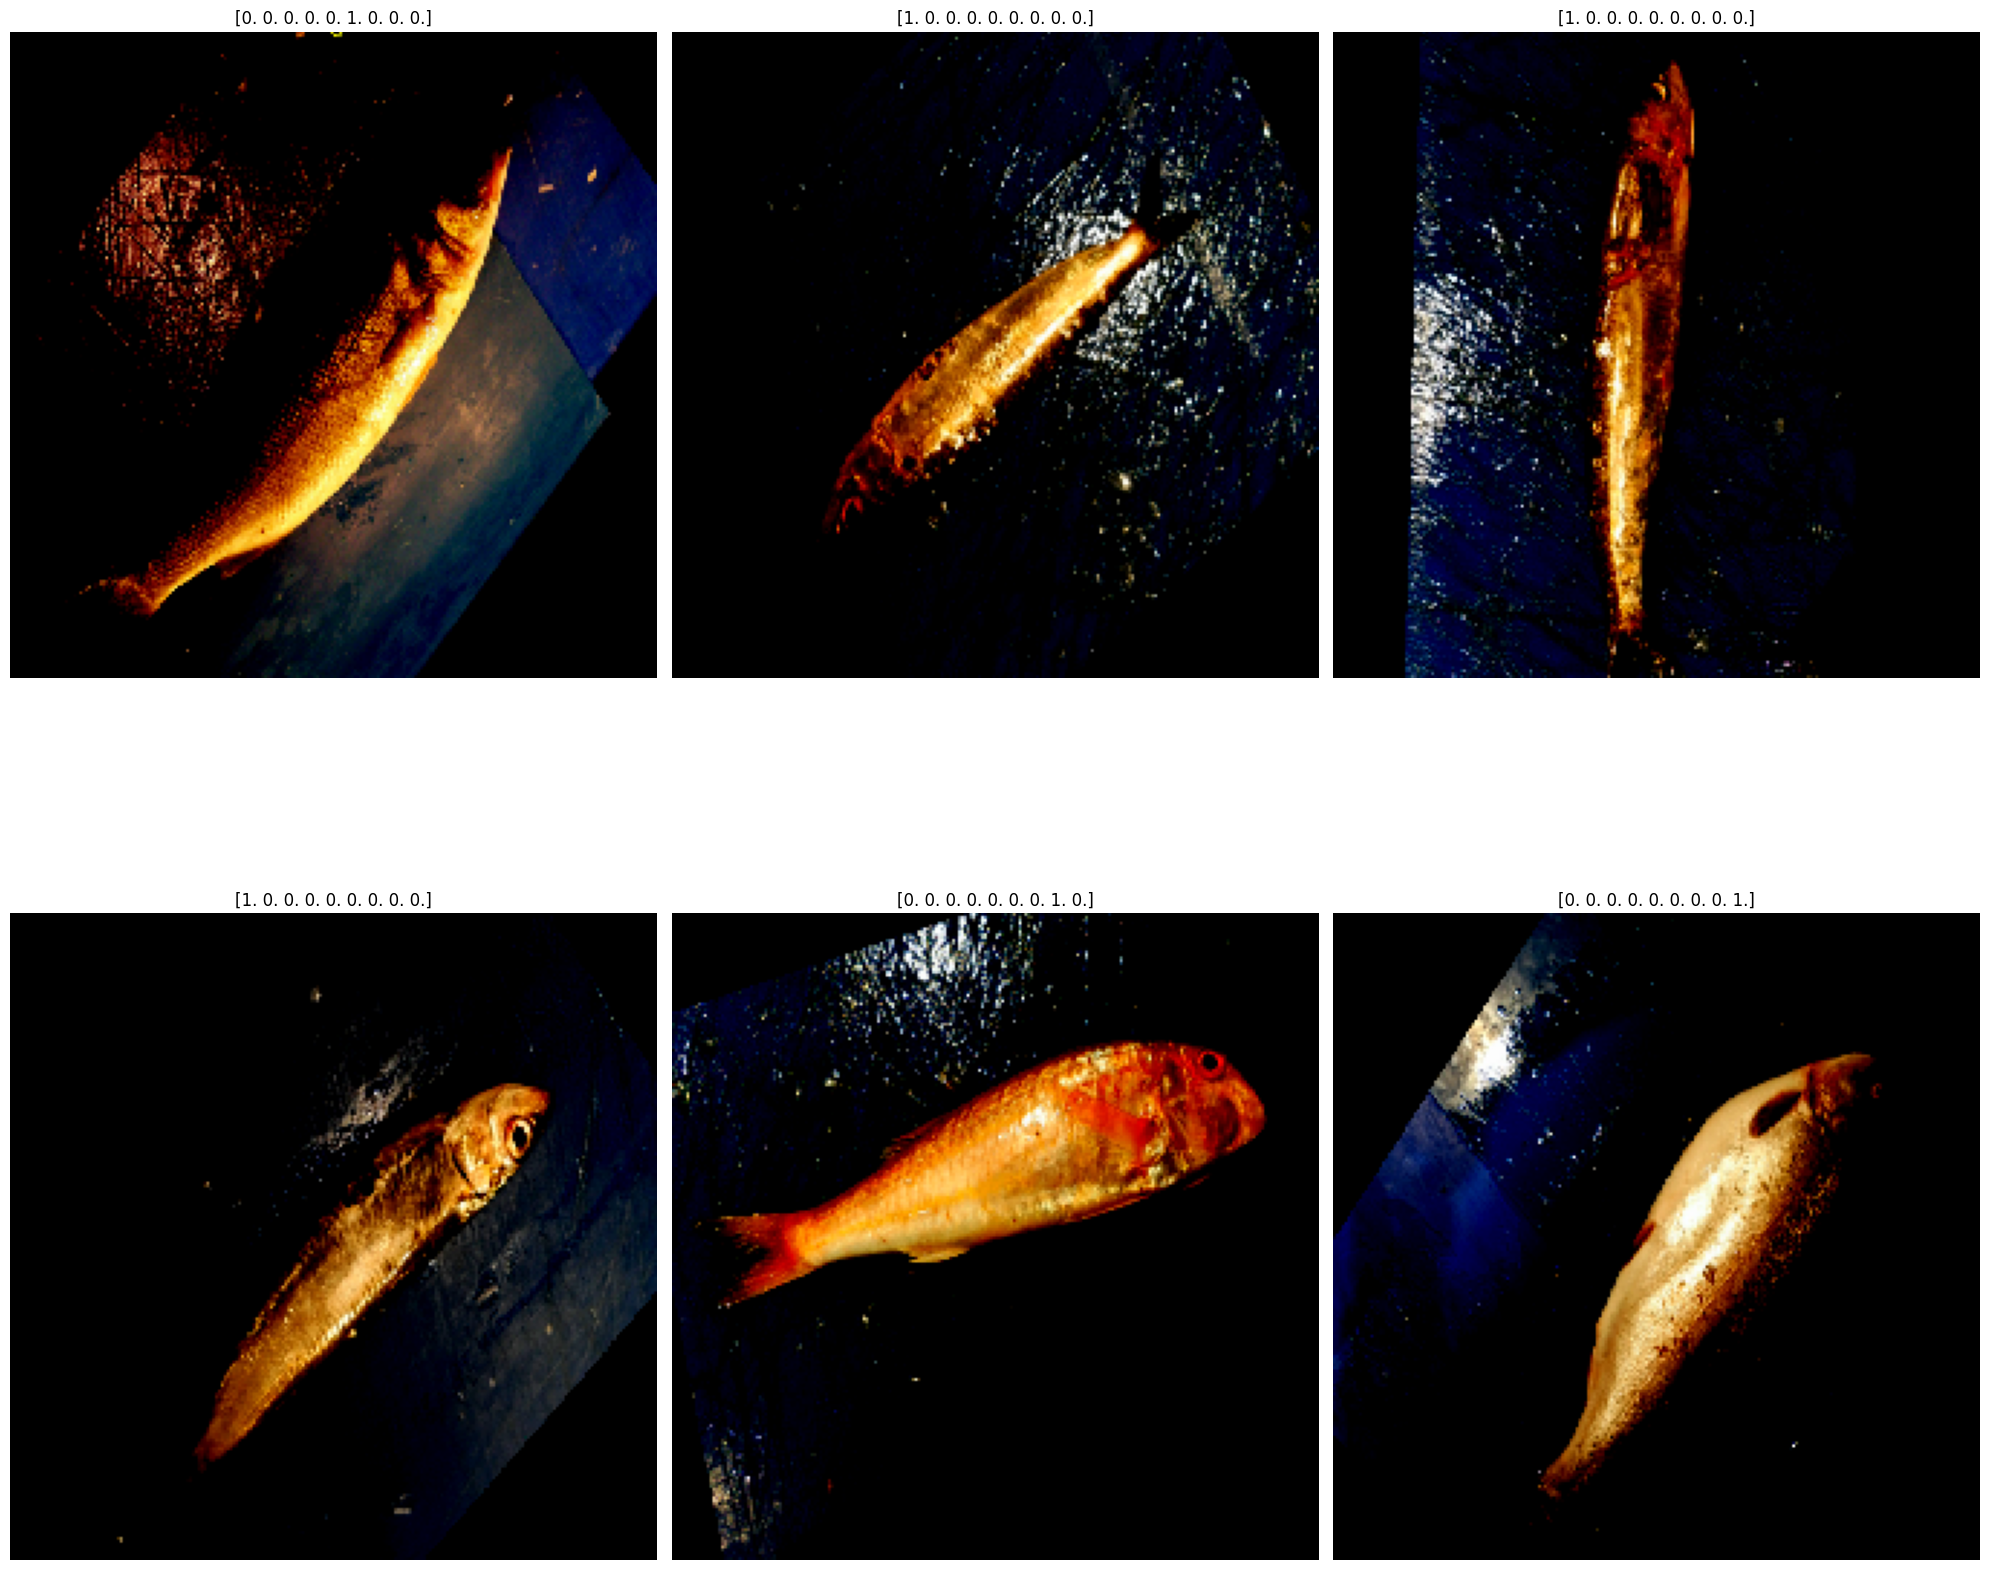

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
ax = ax.flatten()

for j in range(6):
    img, label = next(test_images)


    if isinstance(label, (list, np.ndarray)):
        label = label[0]

    if not isinstance(label, str):
        label = str(label)

    ax[j].imshow(img[0])
    ax[j].set_title(label)
    ax[j].axis('off')

plt.tight_layout()
plt.show()

# Model Building

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,439,625 (9.31 MB)

 Trainable params: 181,641 (709.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 99s 463ms/step - accuracy: 0.8532 - loss: 0.5324 - val_accuracy: 0.9986 - val_loss: 0.0160
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 73s 397ms/step - accuracy: 0.9971 - loss: 0.0128 - val_accuracy: 0.9896 - val_loss: 0.0296
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 77s 371ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9972 - val_loss: 0.0059
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 89s 413ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 68s 370ms/step - accuracy: 0.9992 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0017


In [ ]:
model.evaluate(test_images, verbose=0)

[0.0027929984498769045, 0.9994444251060486]

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 328ms/step


In [ ]:
predict_data=test_data.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
predict_data['pred']=pred
predict_data['pred']=predict_data['pred'].apply(lambda x: labels[x])

In [ ]:
predict_data=predict_data.reset_index(drop=True)
predict_data.head(10)
predict_data=predict_data.reset_index(drop=True)
predict_data.head(10)

path               label  \
0  fish_dataset/Fish_Dataset/Fish_Dataset/Sea Bas...            Sea Bass   
1  fish_dataset/Fish_Dataset/Fish_Dataset/Black S...     Black Sea Sprat   
2  fish_dataset/Fish_Dataset/Fish_Dataset/Shrimp/...              Shrimp   
3  fish_dataset/Fish_Dataset/Fish_Dataset/Striped...  Striped Red Mullet   
4  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...     Hourse Mackerel   
5  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...     Hourse Mackerel   
6  fish_dataset/Fish_Dataset/Fish_Dataset/Red Sea...       Red Sea Bream   
7  fish_dataset/Fish_Dataset/Fish_Dataset/Hourse ...     Hourse Mackerel   
8  fish_dataset/Fish_Dataset/Fish_Dataset/Red Mul...          Red Mullet   
9  fish_dataset/Fish_Dataset/Fish_Dataset/Striped...  Striped Red Mullet   

                 pred  
0            Sea Bass  
1     Black Sea Sprat  
2              Shrimp  
3  Striped Red Mullet  
4     Hourse Mackerel  
5     Hourse Mackerel  
6       Red Sea Bream  
7     Hourse Mackerel  
8          Red Mullet  
9  Striped Red Mullet

In [ ]:
predict_data[predict_data['label']!=predict_data['pred']]

path            label  \
1413  fish_dataset/Fish_Dataset/Fish_Dataset/Black S...  Black Sea Sprat   

                 pred  
1413  Hourse Mackerel

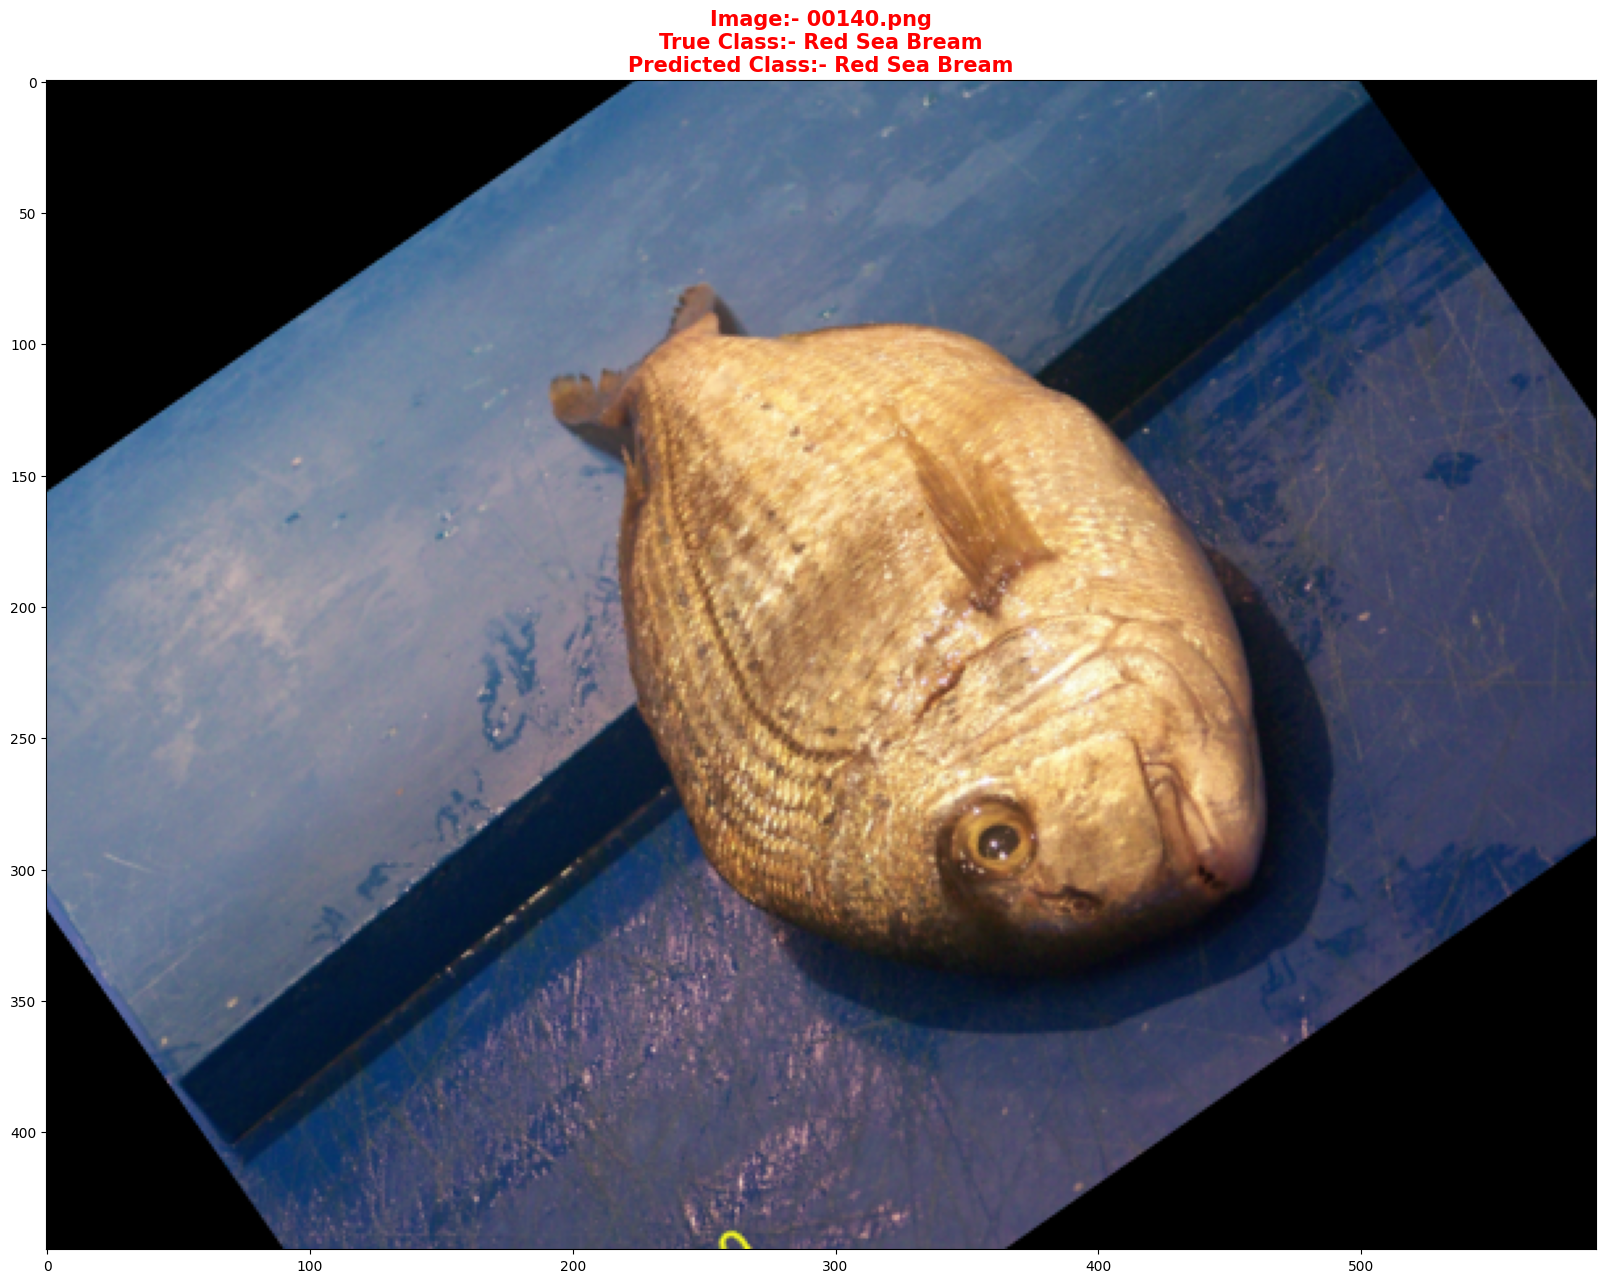

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread(predict_data.path[1604]))
title1 = predict_data.path[1604].split('/')[-2]
title2 = predict_data.path[1604].split('/')[-1]
title3 = predict_data.pred[1604]
plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
plt.show()

Accuracy Score: 0.9994444444444445


<Axes: >

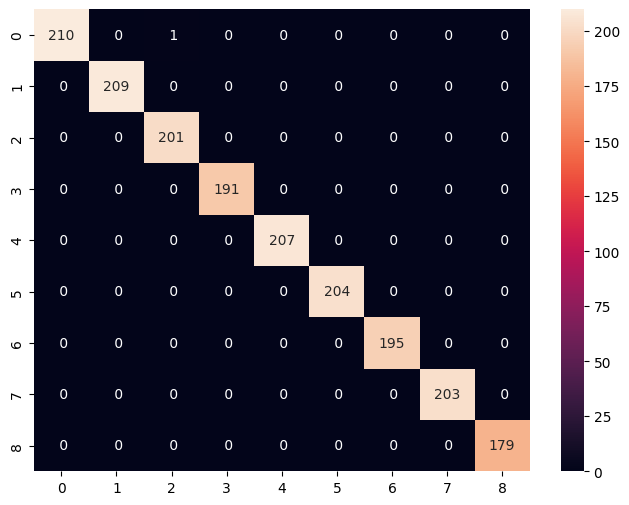

In [ ]:
print(f"Accuracy Score: {accuracy_score(predict_data['label'],predict_data['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(predict_data['label'],predict_data['pred']), annot=True, fmt='2d')

In [ ]:
print(classification_report(predict_data['label'],predict_data['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       211
   Gilt-Head Bream       1.00      1.00      1.00       209
   Hourse Mackerel       1.00      1.00      1.00       201
        Red Mullet       1.00      1.00      1.00       191
     Red Sea Bream       1.00      1.00      1.00       207
          Sea Bass       1.00      1.00      1.00       204
            Shrimp       1.00      1.00      1.00       195
Striped Red Mullet       1.00      1.00      1.00       203
             Trout       1.00      1.00      1.00       179

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800

